1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, optimize

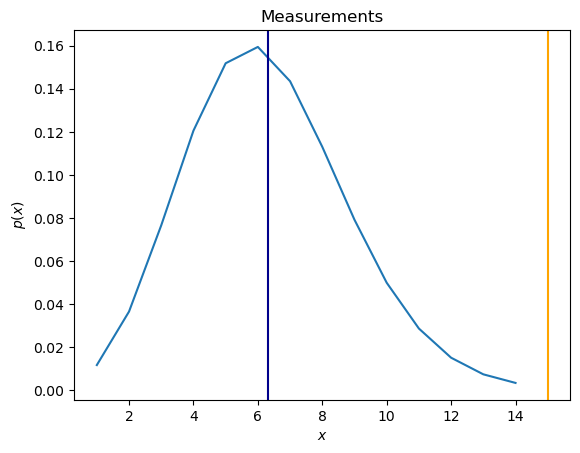


Z = 3.4661629670697414


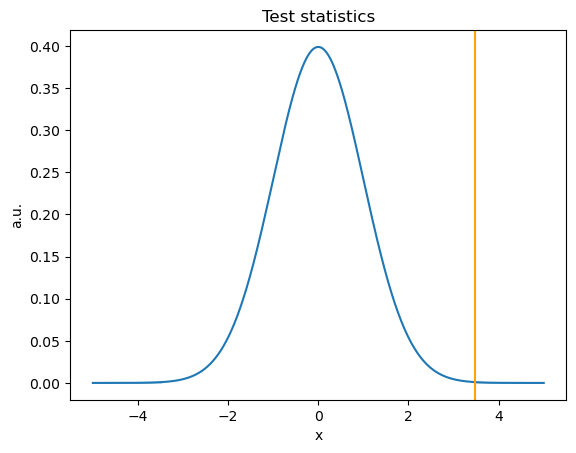

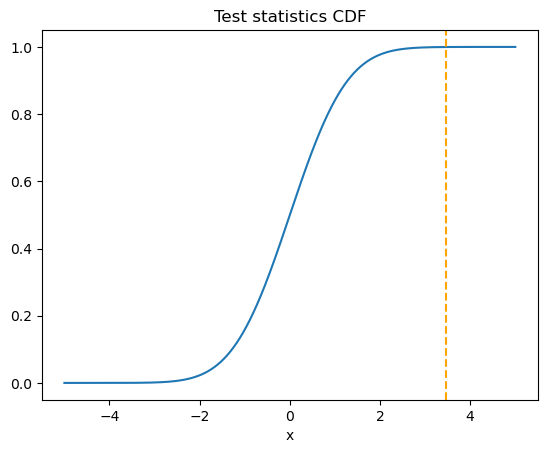


p_value =  0.00026397158691493505
The prob of observe 15 hurricances or more is 0.03%


In [2]:
x0 = 15
mu = 6.3
x=np.arange(stats.poisson.ppf(0.002,mu),stats.poisson.ppf(0.998,mu))
t = stats.poisson.pmf(x,mu)
plt.plot(x,t)
plt.axvline(x0,linestyle='-',color='orange')
plt.axvline(mu,linestyle='-',color='darkblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

sigma_mu = stats.poisson.std(mu)
Z = (x0-mu)/sigma_mu
print("\nZ =",Z)

xs = np.linspace(-5, +5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='-', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

p_value = 1. - stats.norm.cdf(Z)
print('\np_value = ',p_value)
print(f'The prob of observe 15 hurricances or more is {p_value*100:.2f}%')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

The mean of the differences between pre and post is 18.7

sigma= 10.474970167021958

T= -3.991846326292112


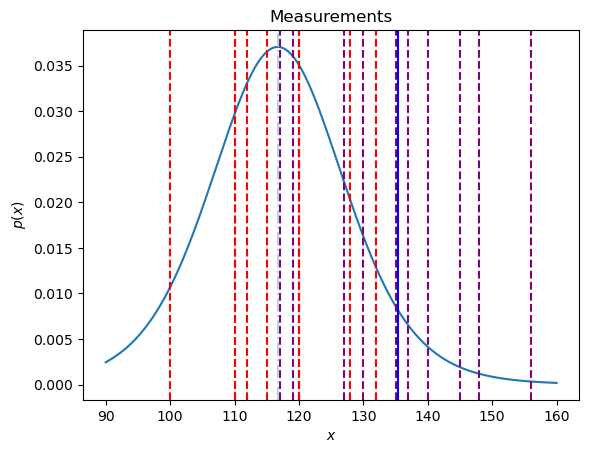

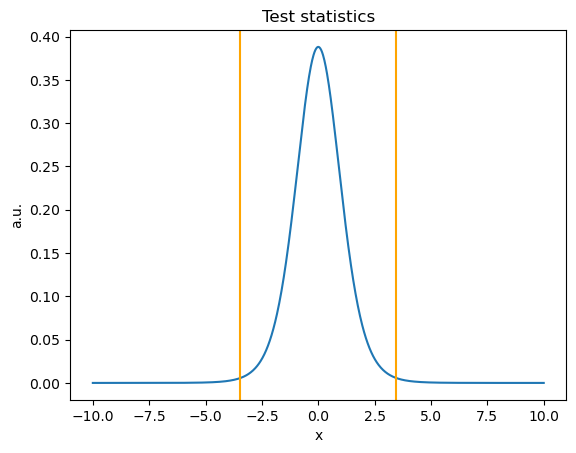


p_value =  0.00314894093545364


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
diff = post - pre

mean_diff = np.mean(diff)
print('The mean of the differences between pre and post is',mean_diff)

n=len(pre)
mean_pre = np.mean(pre)
std_pre =np.std(pre)

mean_post = np.mean(post)
std_post = np.std(post)
sigma = math.sqrt((std_pre**2+std_post**2)/2)
print('\nsigma=',sigma)
T = (mean_pre-mean_post)/(sigma*math.sqrt(2/n))
print('\nT=',T)
mu = mean_pre
x = np.linspace(90,160,1000)
y = stats.t.pdf(x,loc=mu,scale=sigma,df=n-1)
plt.plot(x,y)
plt.axvline(mean_post,linestyle='-', color='blue')
for l_pre,l_post in zip(pre,post):
    plt.axvline(l_pre, linestyle='--', color='red')
    plt.axvline(l_post, linestyle='--', color='purple')
plt.axvline(mu, linestyle='-.', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs,n-1)
plt.plot(xs, ts)
plt.axvline(Z, linestyle='-', color='orange')
plt.axvline(-Z, linestyle='-', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

p_value = stats.t.cdf(T,n-1)+(1.-stats.t.cdf(-T,n-1))
print('\np_value = ',p_value)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

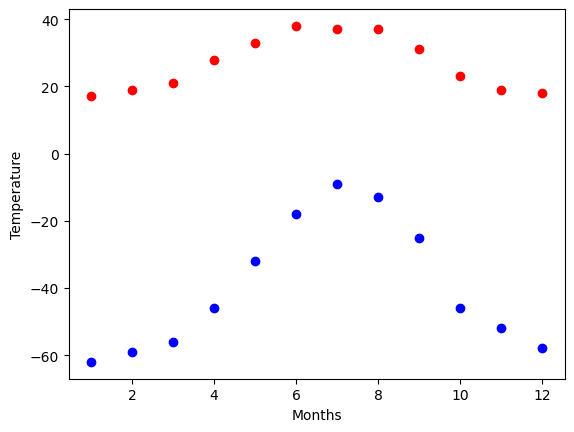

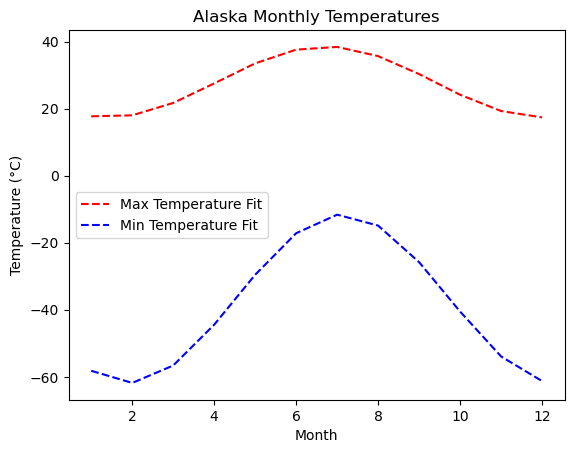

R2_max = 0.9882502430477916 
R_max = 0.9941077622912878
R2_min = 0.9787202745547927 
R_min = 0.989302923555163
Correlation coefficients are high so the fit is good


In [4]:
t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

t_max_mean = np.mean(t_max)
t_max_range = (np.max(t_max) - np.min(t_max)) / 2

t_min_mean = np.mean(t_min)
t_min_range = (np.max(t_min) - np.min(t_min)) / 2

months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(months,t_max,'ro',months,t_min,'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

# Define a suitable function (e.g., sine function) that can describe min and max temperatures
def temp_function(x, a, b, c, d):
    return a * np.cos(b * x + c) + d

# Fit the function to the data
params_max, _ = optimize.curve_fit(temp_function, months, t_max)
params_min, _ = optimize.curve_fit(temp_function, months, t_min)

# Generate temperature predictions using the fitted parameters
max_temp_fit = temp_function(months, *params_max)
min_temp_fit = temp_function(months, *params_min)

# Plot the fitted curves
plt.plot(months, max_temp_fit, label='Max Temperature Fit', color='red', linestyle='--')
plt.plot(months, min_temp_fit, label='Min Temperature Fit', color='blue', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Alaska Monthly Temperatures')
plt.legend()
plt.show()

# Check if the time offset for min and max temperatures is the same within the fit accuracy
ssr_max = np.sum((t_max - max_temp_fit)**2)
tss_max = np.sum((np.mean(t_max) - t_max)**2)

rsq_max = 1 - ssr_max / tss_max

ssr_min = np.sum((t_min - min_temp_fit)**2)
tss_min = np.sum((np.mean(t_min) - t_min)**2)

rsq_min = 1 - ssr_min / tss_min

print("R2_max =", rsq_max, "\nR_max =", np.sqrt(rsq_max))
print("R2_min =", rsq_min, "\nR_min =", np.sqrt(rsq_min))
print('Correlation coefficients are high so the fit is good')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

Max residual=  11.32000000000005
Min residual = -160.8499999999989
Avg = -0.6164773541075758
std = 4.163517709439674


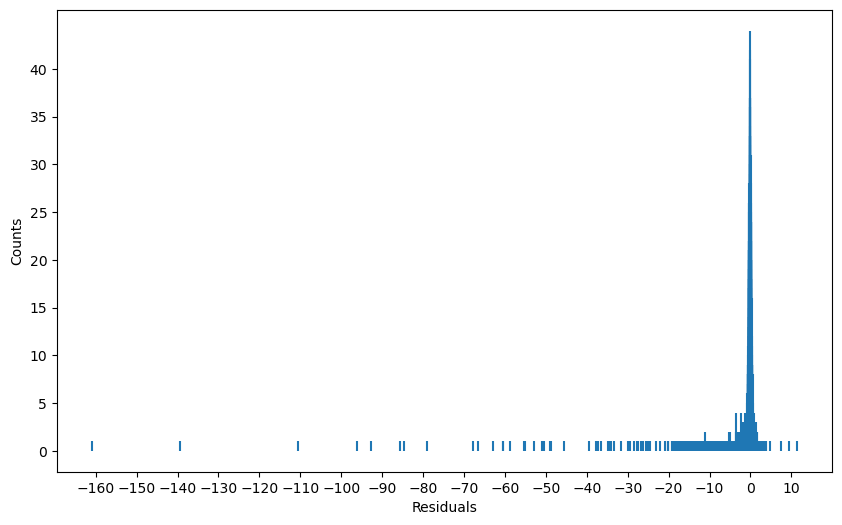

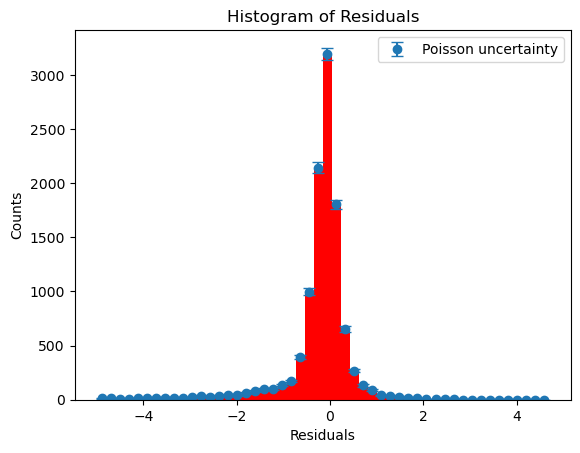

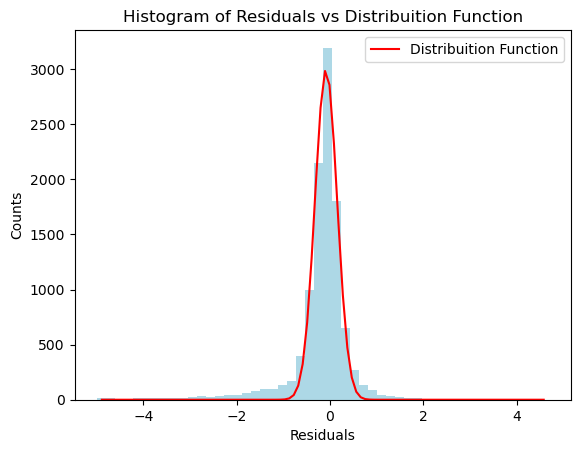

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2_contingency

# Download the file using wget or any other method

# Load the data
residuals = np.load('data/residuals_261.pkl', allow_pickle=True).reshape(-1)[0]
residuals = residuals['residuals']
data_path = "data/residuals_261.pkl"
data = np.load(data_path, allow_pickle=True).reshape(-1)[0]
residuals = data['residuals']

print('Max residual= ', max(residuals))
print('Min residual =', min(residuals))
print('Avg =', np.mean(residuals))
print('std =' , np.std(residuals))

# Plot the unique residuals with their count
uniques, counts = np.unique(residuals, return_counts=True)

plt.figure(figsize=(10,6))
plt.vlines(uniques, ymin=0, ymax=counts)
plt.ylabel("Counts")
plt.xlabel("Residuals")
plt.yticks([k for k in range(0,max(counts),5)])
plt.xticks([k for k in range(int(min(uniques)),int(max(uniques)),10)])
plt.show()

filtered_residuals = residuals[abs(residuals)<5]
fig = plt.figure()
n, bins_edge, _ = plt.hist(filtered_residuals, bins=50, density=False, cumulative=False,color='red')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Counts')

center = (bins_edge[:-1] + bins_edge[1:]) / 2
plt.errorbar(center, n, yerr=np.sqrt(n), fmt='o', capsize=4, label= "Poisson uncertainty")
plt.legend()
plt.show()

def function(a,b,c,d):
    return d* np.exp(-(a-b)**2/(2*c**2))

params,_ = curve_fit(function,center,n,[0,1,1])
f2=plt.figure()
x_fit = np.linspace(min(center), max(center), 100)
y_fit = function(x_fit, *params)
n, bins_edge, _ = plt.hist(filtered_residuals, bins=50, density=False, cumulative=False, color = 'lightblue')
plt.plot(x_fit, y_fit, color='red', label='Distribuition Function')
plt.title('Histogram of Residuals vs Distribuition Function')
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.legend()
plt.show()



5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

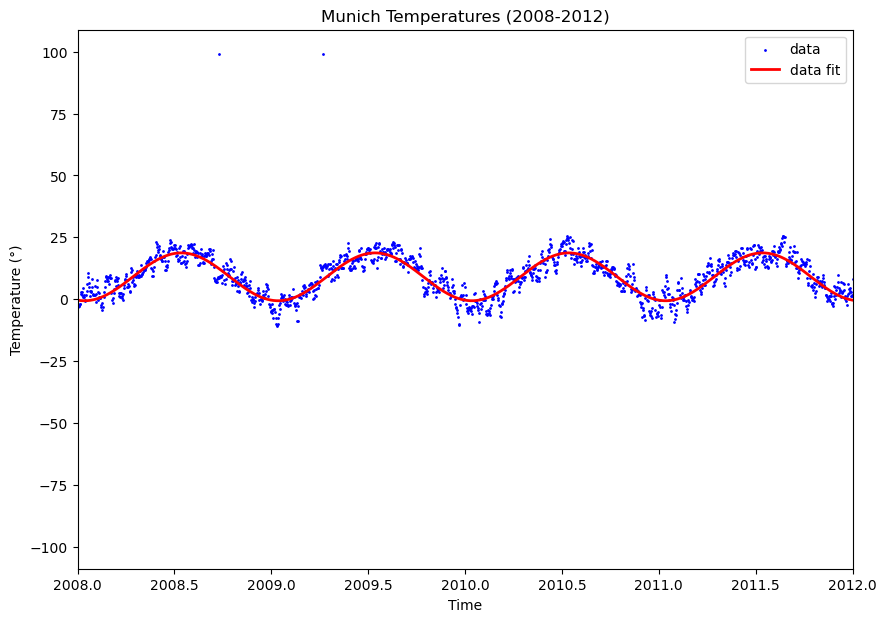

The best fit values paramenters are a=-9.67, b=12.34 and c=9.05
The overall avg temperature in Munich is 8.94°C
The maximum temperature is 18.72°C
The minimum temperature is -0.62°C


In [6]:
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
time = data[:,0]
temp = data[:,1]

def function(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

param,_ = curve_fit(function,time,temp)
a_opt,b_opt,c_opt = param
data_fit = function(time,a_opt,b_opt,c_opt)




plt.figure(figsize=(10,7))
plt.scatter(time, temp, c='blue', s=1, label='data')
plt.title("Munich Temperatures (2008-2012)")
plt.ylabel("Temperature (°)")
plt.xlabel("Time")
plt.plot(time, data_fit, color='red', linewidth=2, label='data fit')
plt.legend(loc='best')
plt.xlim(2008,2012)
plt.show()

print(f'The best fit values paramenters are a={a_opt:.2f}, b={b_opt:.2f} and c={c_opt:.2f}')
print(f'The overall avg temperature in Munich is {np.mean(data_fit):.2f}°C')
print(f'The maximum temperature is {np.max(data_fit):.2f}°C')
print(f'The minimum temperature is {np.min(data_fit):.2f}°C')

#b indicates the phase shift of the cosine inside the fit model